## 1. Exploración de Datos

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
gasto_publicidad = np.random.normal(100, 20, 100)  # Gasto en publicidad (en dólares)
ventas = 50 + 3 * gasto_publicidad + np.random.normal(0, 30, 100)  # Ventas (en unidades)

# Crear un DataFrame de Pandas con los datos
df = pd.DataFrame({'Gasto en Publicidad (USD)': gasto_publicidad, 'Ventas (unidades)': ventas})

# Visualizar los primeros 5 registros del DataFrame
print(df.head())

   Gasto en Publicidad (USD)  Ventas (unidades)
0                 135.281047         512.337662
1                 108.003144         333.576661
2                 119.574760         370.609729
3                 144.817864         513.535493
4                 137.351160         426.859777


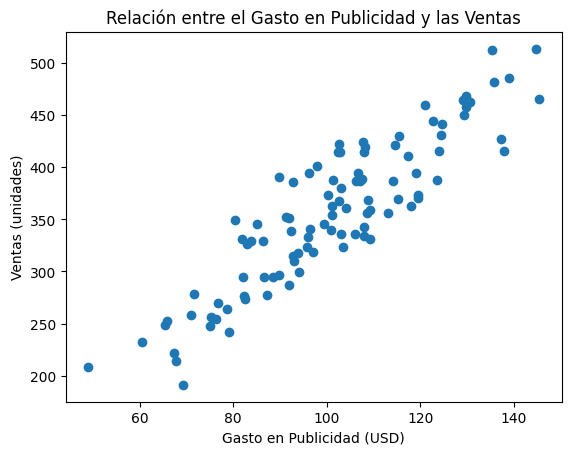

In [2]:

import matplotlib.pyplot as plt

# Visualizar los datos
plt.scatter(gasto_publicidad, ventas)
plt.xlabel('Gasto en Publicidad (USD)')
plt.ylabel('Ventas (unidades)')
plt.title('Relación entre el Gasto en Publicidad y las Ventas')
plt.show()

## 2. Preprocesamiento de Datos

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Selección de características y variable objetivo
X = df.drop('Ventas (unidades)', axis=1)
y = df['Ventas (unidades)']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 3. Modelado Básico

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## 4. Evaluación de Modelos

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 1259.9352958494278


In [8]:
# Calculando la varianza y el rango de la variable objetivo
variance = y.var()
data_range = y.max() - y.min()

print(f'MSE: {mse}')
print(f'Varianza de la variable objetivo: {variance}')
print(f'Rango de la variable objetivo: {data_range}')

# Comparando el MSE con la varianza y el rango
print(f'Relación MSE/Varianza: {mse/variance}')
print(f'Relación MSE/Rango: {mse/data_range}')

MSE: 1259.9352958494278
Varianza de la variable objetivo: 5090.815600329678
Rango de la variable objetivo: 322.41220894019403
Relación MSE/Varianza: 0.24749183525088497
Relación MSE/Rango: 3.9078399046704213


## 5. Iteración del Modelo

In [12]:
from xgboost import XGBRegressor

In [20]:
# Crear y entrenar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Realizar predicciones con el modelo XGBoost
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluar el modelo XGBoost
xgb_mse = mean_squared_error(y_test, xgb_pred)
print(f'XGBoost MSE: {xgb_mse}')


XGBoost MSE: 1196.812238470982


### El resultado de `1196.81` para el MSE del modelo XGBoost nos muestra que mejora en comparación con el MSE de la regresión lineal, que fue de `1259.93`.